# Histology image correction / enhancement
Erik Matovič

In [6]:
import cv2
from matplotlib import pyplot as plt
from utils import show_img, resize_img

print(cv2.__version__)

4.7.0


## 1. Load images

In [8]:
img1 = cv2.imread('/home/erik/FIIT/2_Ing/2_semester/PVID/zadanie2/figures/Histology nuclei/TCGA-18-5592-01Z-00-DX1.tif')
img2 = cv2.imread('/home/erik/FIIT/2_Ing/2_semester/PVID/zadanie2/figures/Histology nuclei/TCGA-21-5784-01Z-00-DX1.tif')
img3 = cv2.imread('/home/erik/FIIT/2_Ing/2_semester/PVID/zadanie2/figures/Histology nuclei/TCGA-21-5786-01Z-00-DX1.tif')
img4 = cv2.imread('/home/erik/FIIT/2_Ing/2_semester/PVID/zadanie2/figures/Histology nuclei/TCGA-38-6178-01Z-00-DX1.tif')
img5 = cv2.imread('/home/erik/FIIT/2_Ing/2_semester/PVID/zadanie2/figures/Histology nuclei/TCGA-49-4488-01Z-00-DX1.tif')
img6 = cv2.imread('/home/erik/FIIT/2_Ing/2_semester/PVID/zadanie2/figures/Histology nuclei/TCGA-50-5931-01Z-00-DX1.tif')

show_img(img1, 'img1')
show_img(img2, 'img2')
show_img(img3, 'img3')
show_img(img4, 'img4')
show_img(img5, 'img5')
show_img(img6, 'img6')

Resizing images:

In [9]:
img1_resize = resize_img(img1, 50) 
img2_resize = resize_img(img2, 50) 
img3_resize = resize_img(img3, 50) 
img4_resize = resize_img(img4, 50) 
img5_resize = resize_img(img5, 50) 
img6_resize = resize_img(img6, 50) 

show_img(img1_resize, 'img1_resize')
show_img(img2_resize, 'img2_resize')
show_img(img3_resize, 'img3_resize')
show_img(img4_resize, 'img4_resize')
show_img(img5_resize, 'img5_resize')
show_img(img6_resize, 'img6_resize')

<Figure size 640x480 with 0 Axes>

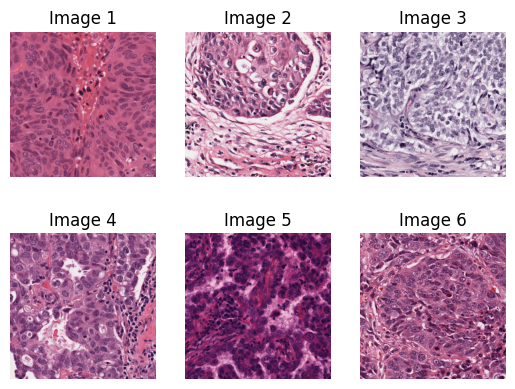

In [12]:
plt.figure()
f, axarr = plt.subplots(2,3)

img1_rgb = cv2.cvtColor(img1_resize, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2_resize, cv2.COLOR_BGR2RGB)
img3_rgb = cv2.cvtColor(img3_resize, cv2.COLOR_BGR2RGB)
img4_rgb = cv2.cvtColor(img4_resize, cv2.COLOR_BGR2RGB)
img5_rgb = cv2.cvtColor(img5_resize, cv2.COLOR_BGR2RGB)
img6_rgb = cv2.cvtColor(img6_resize, cv2.COLOR_BGR2RGB)

axarr[0][0].imshow(img1_rgb)
axarr[0][1].imshow(img2_rgb)
axarr[0][2].imshow(img3_rgb)
axarr[1][0].imshow(img4_rgb)
axarr[1][1].imshow(img5_rgb)
axarr[1][2].imshow(img6_rgb)

axarr[0][0].set_title('Image 1')
axarr[0][1].set_title('Image 2')
axarr[0][2].set_title('Image 3')
axarr[1][0].set_title('Image 4')
axarr[1][1].set_title('Image 5')
axarr[1][2].set_title('Image 6')

axarr[0][0].axis('off')
axarr[0][1].axis('off')
axarr[0][2].axis('off')
axarr[1][0].axis('off')
axarr[1][1].axis('off')
axarr[1][2].axis('off')

plt.show()

## 2. Image correction
Histogram computation (visualize histogram for each color model used)

Histogram equalization - for multiple color models (Grayscale, RGB, YCbCr, HSV, XYZ, Lab). Make assumption how to properly correct the image using following color models and document the steps with your reasoning.
 - Gamma correction (hint: pow)
 - **Optional:** Source -> Target color correction using eCDF (effective Cummulative Distribution Function) and linear interpolation
   - Target is an image you selected from the dataset. We want to change the color distribution of other (sources) images to the target one
   - for RGB and YCbCr only

## 3. Image enhancement
Segmentation utilizing the color information (Lab color model)
   - Make sure your Lab conversion is in correct data range 
   - Select the small part of the image containing only nuclei and compute its Lab color model (target) - average L / a / b values
   - Compute delta Lab - difference image between the input and the target
     - Hint how to compute difference in the slides from lecture
     - Visualize
   - Use the obtained difference image and try to segment nuclei by thresholding

Use your knowledge of local descriptors to detect and localize image patch within the larger image from following data - [link](https://drive.google.com/file/d/10oNHED7BGrcYomKd3Cn5J1ZKQuQ9TR5d/view)
   - Experiment with feature detectors: SIFT, FAST, Harris
   - Experiment with feature descriptors: SIFT, SURF, ORB
   - Compute homography matrix and localize your image patch
     - Find the best combination of detection & description for your task